# Środowiska uruchomieniowe C3. Streamlit 2.
#### Celem tego ćwiczenia jest przedstawienie w uproszczeniu procesu trenowania kilku podstawowych modeli ML. Wykorzystamy słynny zbiór danych z Kaggle - Titanic - Machine Learning from Disaster. Więcej informacji o tych danych można znaleźć na stronie internetowej - https://www.kaggle.com/c/titanic/data 

### 1. Import bibliotek

In [69]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 2. Przygotowanie danych do analizy

In [70]:
os.getcwd()

'C:\\Users\\s18651\\SML\\C3\\work'

In [71]:
base_data = pd.read_csv("dane2.csv", delimiter=';');
base_data.columns
# na tym etapie tworzymy nową zmienną, którą nazywamy base_data, zawierającą nasz zbiór danych

cols = ["objawy", "wiek", "choroby", "wzrost", "zdrowie"]
data = base_data[cols].copy()
# tworzymy kopię naszych danych bez zbędnych kolumn (np. PassengerID i Name)

In [72]:
data.isnull().any()
# sprawdzamy czy mamy jakiekolwiek brakujące dane

objawy     False
wiek        True
choroby    False
wzrost      True
zdrowie    False
dtype: bool

#### Możemy wygenerować mapę ciepła symbolizującą braki danych - każdy "pomarańczowy pasek" to miejsce, w którym jest brak danych

<AxesSubplot:>

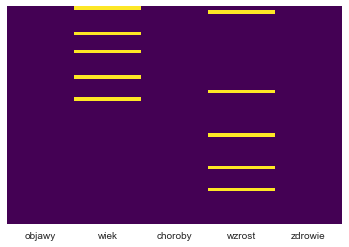

In [73]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# cbar ustalamy jako false, ponieważ nie wniesie nam to dodatkowych informacji

#### Już po tej prostej wizualizacji widzimy, że mamy dużo przypadków brakujących danych odnoszących się do wieku. Brakujące dane odnośnie wieku możemy zastąpić średnią.

In [74]:
# Transformations and additions
data["wzrost"].fillna(data["wzrost"].mean(), inplace=True) # wypełni brakujące informacje wartością "C"
data.dropna(axis=0, inplace=True) # wypełni nam brakujące informacje średnią
data

,objawy,wiek,choroby,wzrost,zdrowie
1,1,65.0,0,183.345455,0
2,1,55.0,0,182.000000,0
3,1,44.0,0,187.000000,0
4,1,77.0,0,165.000000,0
5,1,64.0,0,164.000000,0
6,2,54.0,1,178.000000,0
8,1,76.0,1,200.000000,0
9,2,54.0,0,198.000000,0
10,3,56.0,0,187.000000,0
11,1,68.0,0,167.000000,0


In [75]:
data.isnull().any()

objawy     False
wiek       False
choroby    False
wzrost     False
zdrowie    False
dtype: bool

### 3. Eksploracja danych

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

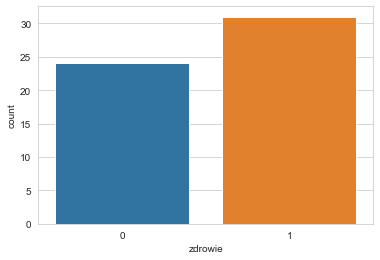

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',data=data)
# używamy biblioteki seaborn do stworzenia prostego wykresu symbolizującego osoby, które przeżyły (1) i nie przeżyły (0)

<AxesSubplot:xlabel='zdrowie', ylabel='count'>

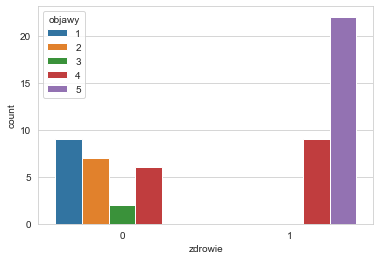

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='zdrowie',hue='objawy',data=data)
# możemy też wygenerować taki wykres, który powie nam więcej o płci osób, które nie przeżyły

<AxesSubplot:xlabel='choroby', ylabel='wzrost'>

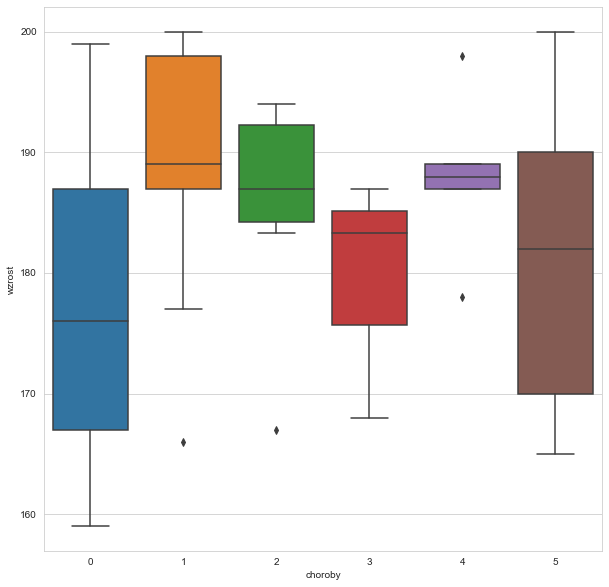

In [78]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='choroby',y='wzrost',data=data)
# wygenerujemy sobie boxplot, czyli wykres skrzynkowy dla wieku oraz klasy pasażerów

### 4. Trenowanie modelu

In [100]:
y = data.iloc[:,4] # survived - zmienna, którą będziemy chcieli przewidzieć
x = data.iloc[:,0:4] # zmienne na podstawie, których chcemy przewidzieć
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
# test size odnosi się do liczby obserwacji przeznaczonej do wytrenowania modelu

In [101]:
def model(X_train, y_train):
    
    forest = RandomForestClassifier( n_estimators=10, random_state=0)
    forest.fit(X_train,y_train)
    print("Las: {0}".format(forest.score(X_train,y_train)) )
    
    lreg =LogisticRegression()
    lreg.fit(X_train,y_train)
    print("Regresja logistyczna: {0}".format(lreg.score(X_train,y_train)) )
  
    tree =DecisionTreeClassifier()
    tree.fit(X_train,y_train)
    print("Drzewa decyzyjne: {0}".format(tree.score(X_train,y_train)) )
   
    return forest, lreg, tree

forest, lreg, tree = model(X_train,y_train)

Las: 0.9736842105263158
Regresja logistyczna: 0.9210526315789473
Drzewa decyzyjne: 1.0


In [102]:
y1_predict = forest.predict(X_test)
print("Random Forest {0}".format(accuracy_score(y_test, y1_predict)))

y2_predict = lreg.predict(X_test)
print("Logistic Regresion {0}".format(accuracy_score(y_test, y2_predict)))

y3_predict = tree.predict(X_test)
print("Decision Tree {0}".format(accuracy_score(y_test, y3_predict)))

# uzyskujemy dzięki temu informacje dotyczącą dokładności modelu 

Random Forest 0.9411764705882353
Logistic Regresion 0.9411764705882353
Decision Tree 0.9411764705882353


In [103]:
print("Ocena modelu 1. Las")
print(classification_report(y_test,y1_predict))
# uzyskujemy informację o precyzji, recall, f1, etc.
# te wszystkie dane przydadzą się nam do oceny naszego modelu

Ocena modelu 1. Las
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.92      1.00      0.96        12

    accuracy                           0.94        17
   macro avg       0.96      0.90      0.92        17
weighted avg       0.95      0.94      0.94        17



In [104]:
print("Ocena modelu 1. Regresja logistyczna")
print(classification_report(y_test,y2_predict))

Ocena modelu 1. Regresja logistyczna
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.92      1.00      0.96        12

    accuracy                           0.94        17
   macro avg       0.96      0.90      0.92        17
weighted avg       0.95      0.94      0.94        17



In [105]:
print("Ocena modelu 1. Drzewa decyzyjne")
print(classification_report(y_test,y3_predict))

Ocena modelu 1. Drzewa decyzyjne
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.92      1.00      0.96        12

    accuracy                           0.94        17
   macro avg       0.96      0.90      0.92        17
weighted avg       0.95      0.94      0.94        17



### 5. Eksport modelu

#### Widzimy, że najlepszymi parametrami cechuje się model pierwszy. Eksportujemy go do pickle.

In [106]:
filename = "model.sv"
pickle.dump(forest, open(filename,'wb'))

### 6. Inne

#### Możemy się jeszcze chwilę pobawić i sprawdzić czy np. osoba z klasy pasażerskiej 1, będąca mężczyzną w wieku 50 lat, nieposiadająca innych członków rodziny, itd. przeżyłaby podróż. Odczytujemy wynik i widzimy, że niestety nie przeżyłaby podróży. Do porównania drugi przykład (kobieta w wieku 20 lat) - model podpowiada nam, że ta osoba przeżyłaby podróż.

In [107]:
my_data =[
            [
             1,    # objawy
             60,   # wiek
             2,    # choroby
             175,  # wzrost
    ]
]

forest.predict(my_data)

c:\users\s18651\.conda\envs\streamlit\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

##### Źródło danych [https://www.kaggle.com/c/titanic/](https://www.kaggle.com/c/titanic), zastosowanie przez Adama Ramblinga